In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drug_death_file = 'Resources/Accidental_Drug_Related_Deaths_2012-2017_cleaned.csv'
unemployment_file = 'Resources/Unemployment_rate_by_county.csv'

In [3]:
drug_death_df = pd.read_csv(drug_death_file)
unemployment_df = pd.read_csv(unemployment_file)

In [4]:
unemployment_df.head()

,County,Year,Period,Unemployment Rate,Footnote
0,Fairfield,2017,Dec,3.9,"Data were subject to revision on April 20, 2018."
1,Fairfield,2017,Nov,4.1,"Data were subject to revision on April 20, 2018."
2,Fairfield,2017,Oct,4.2,"Data were subject to revision on April 20, 2018."
3,Fairfield,2017,Sept,4.2,"Data were subject to revision on April 20, 2018."
4,Fairfield,2017,Aug,4.6,"Data were subject to revision on April 20, 2018."


In [5]:
drug_death_df.head()

,CaseNumber,Date,Year,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,...,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc,DeathLocationCity,DeathLocLat,DeathLocLong
0,12-16897,11/30/2012,2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\r\r\r\n(41.308252, -72.924161)",NEW HAVEN,41.30825,72.924161
1,13-11849,8/12/2013,2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\r\r\r\n(41.308252, -72.924161)",NEW HAVEN,41.30825,72.924161
2,14-17578,11/23/2014,2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,...,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\r\r\r\n(41.576633, -73.408713)",NEW MILFORD,41.57663,73.408713
3,12-11497,8/14/2012,2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,...,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\r\r\r\n(41.976501, -72.591985)",ENFIELD,41.9765,72.591985
4,13-2133,2/4/2013,2013,Male,White,25.0,POMFRET,NaN,WINDHAM,POMFRET,...,NaN,NaN,NaN,NaN,Accident,NaN,"POMFRET, CT\r\r\r\n(41.897524, -71.962064)",POMFRET,41.89752,71.962064


### Unemployment rate

In [6]:
groupby_county_year = unemployment_df.groupby(['County','Year'])

In [7]:
unemployment_rate_yearly = groupby_county_year['Unemployment Rate'].mean().unstack(level=0)

In [8]:
unemployment_rate_yearly['State'] = unemployment_rate_yearly.mean(axis=1)
unemployment_rate_yearly.columns= unemployment_rate_yearly.columns.str.lower()
unemployment_rate_yearly

County,fairfield,hartford,litchfield,middlesex,new haven,new london,tolland,windham,state
Year,,,,,,,,,
2012,7.983333,8.325000,10.266667,8.566667,8.566667,9.025000,8.325000,7.300000,8.544792
2013,7.508333,7.791667,9.725000,7.966667,7.966667,8.450000,7.791667,7.225000,8.053125
2014,6.391667,6.625000,8.341667,6.725000,6.725000,7.141667,6.625000,6.133333,6.838542
2015,5.525000,5.716667,7.266667,5.733333,5.733333,6.166667,5.716667,5.141667,5.875000
2016,5.016667,5.191667,6.341667,5.108333,5.108333,5.250000,5.191667,4.208333,5.177083
2017,4.658333,4.683333,5.791667,4.641667,4.641667,4.575000,4.683333,3.933333,4.701042


### Drug related death

In [10]:
drug_death_and_year_df = drug_death_df.groupby(['Death County','Year'])['CaseNumber'].count().unstack(level=0)
drug_death_and_year_df['STATE'] = drug_death_and_year_df.mean(axis=1)
drug_death_and_year_df.columns = drug_death_and_year_df.columns.str.lower()
drug_death_and_year_df

Death County,fairfield,hartford,litchfield,middlesex,new haven,new london,tolland,windham,state
Year,,,,,,,,,
2012,52,101,18,18,99,41,12,14,44.375
2013,94,132,36,17,135,56,10,9,61.125
2014,92,168,36,23,140,51,23,24,69.625
2015,101,212,47,39,210,61,20,33,90.375
2016,165,286,29,34,263,91,22,27,114.625
2017,164,339,49,45,288,81,28,44,129.750


In [14]:
counties = unemployment_rate_yearly.columns
data = dict()
for county in counties:
    
    county_df = pd.DataFrame({'Death':drug_death_and_year_df[county].values},                          index=drug_death_and_year_df.index)
    county_df['Unemployment rate'] =unemployment_rate_yearly[county] * 10
    county_df  = county_df.reset_index()
    data[county] = county_df

In [16]:
data['fairfield']

,Year,Death,Unemployment rate
0,2012,52,79.833333
1,2013,94,75.083333
2,2014,92,63.916667
3,2015,101,55.250000
4,2016,165,50.166667
5,2017,164,46.583333


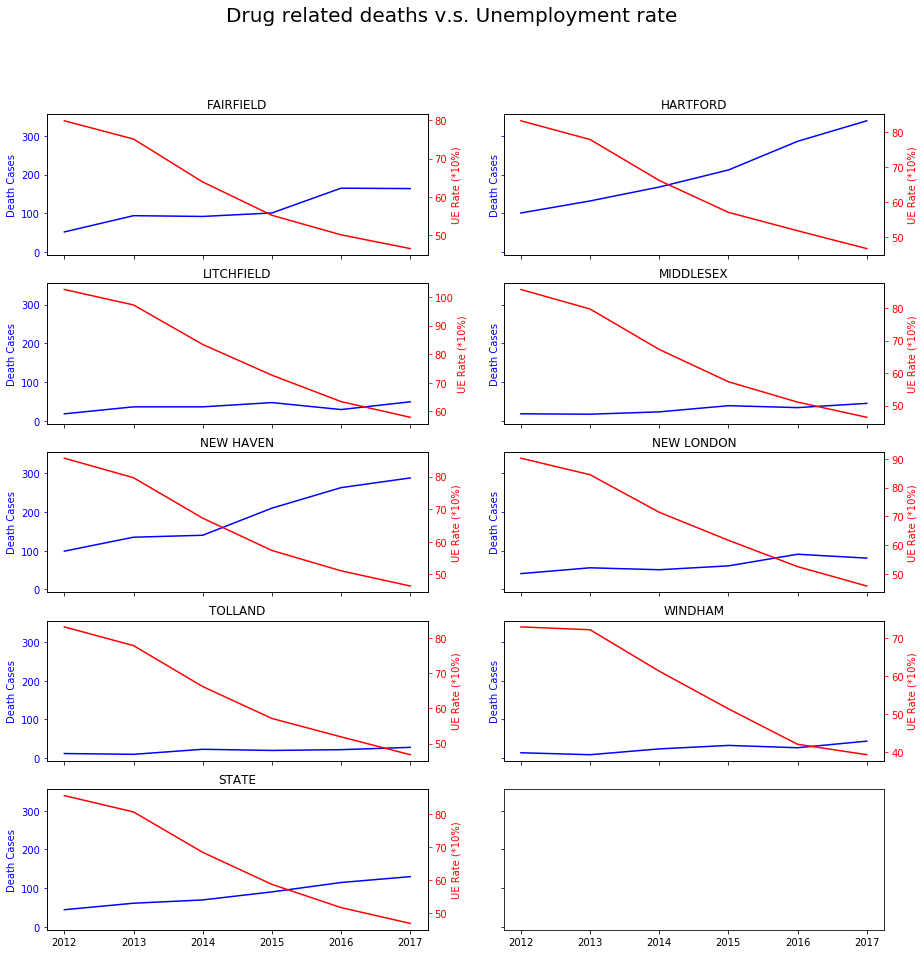

In [71]:
fig, axes= plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True,
                       figsize=(15,15))
fig.suptitle("Drug related deaths v.s. Unemployment rate", fontsize=20)
index = 0
row_index = 0
for county, df in data.items():
    row_index, col_index = row_index, int(index%2)
#     print(f"row: {row_index}, col:{col_index}")
    ax = axes[row_index, col_index]

    ax.plot(df['Year'],df['Death'], 'b-')
    ax.set_ylabel('Death Cases', color='b')
    ax.tick_params('y', colors='b')
    ax.set_title(county.upper())
    
    axes2 = ax.twinx()
    axes2.plot(df['Year'],df['Unemployment rate'], 'r-')
    axes2.set_ylabel('UE Rate (*10%)',color='r')
    axes2.tick_params('y', colors='r')

    
    if col_index == 1 and index !=0:
        row_index += 1
    index +=1 
fig.savefig('Drug deaths vs ue rate.png')